In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine, text, Column, Integer, String, Float, inspect
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import MetaData
from pathlib import Path



In [4]:
# create engine to hawaii.sqlite
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

 # Declare a Base using `automap_base()`
Base = automap_base()

In [5]:
# reflect an existing database into a new model
Base.metadata.create_all(engine)

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Collect the names of tables within the database
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [9]:
# Using the inspector to print the column names
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Using the inspector to print the column names
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [12]:
# Calculate the date one year from the last date in data set.

one_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_date)

2016-08-23


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

precipitation_data = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= one_year_date).all()



In [14]:
# Perform a query to retrieve the data and precipitation scores

for date, prcp in precipitation_data:
    print(f"Date: {date}, Precipitation: {prcp}")

Date: 2016-08-23, Precipitation: 0.0
Date: 2016-08-24, Precipitation: 0.08
Date: 2016-08-25, Precipitation: 0.08
Date: 2016-08-26, Precipitation: 0.0
Date: 2016-08-27, Precipitation: 0.0
Date: 2016-08-28, Precipitation: 0.01
Date: 2016-08-29, Precipitation: 0.0
Date: 2016-08-30, Precipitation: 0.0
Date: 2016-08-31, Precipitation: 0.13
Date: 2016-09-01, Precipitation: 0.0
Date: 2016-09-02, Precipitation: 0.0
Date: 2016-09-03, Precipitation: 0.0
Date: 2016-09-04, Precipitation: 0.03
Date: 2016-09-05, Precipitation: None
Date: 2016-09-06, Precipitation: None
Date: 2016-09-07, Precipitation: 0.05
Date: 2016-09-08, Precipitation: 0.0
Date: 2016-09-09, Precipitation: 0.03
Date: 2016-09-10, Precipitation: 0.0
Date: 2016-09-11, Precipitation: 0.05
Date: 2016-09-12, Precipitation: 0.0
Date: 2016-09-13, Precipitation: 0.02
Date: 2016-09-14, Precipitation: 1.32
Date: 2016-09-15, Precipitation: 0.42
Date: 2016-09-16, Precipitation: 0.06
Date: 2016-09-17, Precipitation: 0.05
Date: 2016-09-18, Preci

In [15]:
# Sort the dataframe by date
df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])
df = df.sort_values('Date')
df.head()

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


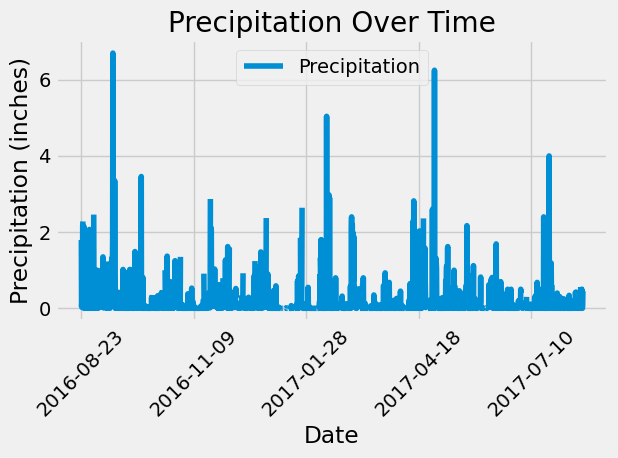

<Figure size 640x480 with 0 Axes>

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(x = 'Date', y = 'Precipitation')

# Customize the plot
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# Save Image
plt.savefig("Fig1.png")

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()


[(9,)]

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station =='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [21]:
session.query(func.max(Measurement.date)).first()


('2017-08-23',)

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_id = 'USC00519281'


most_recent_date = dt.date(2017,8,18) - dt.timedelta(days=365)


year_temp = session.query(Measurement.tobs).filter(Measurement.station == station_id).\
      filter(Measurement.date >= most_recent_date).\
      order_by(Measurement.tobs).all()

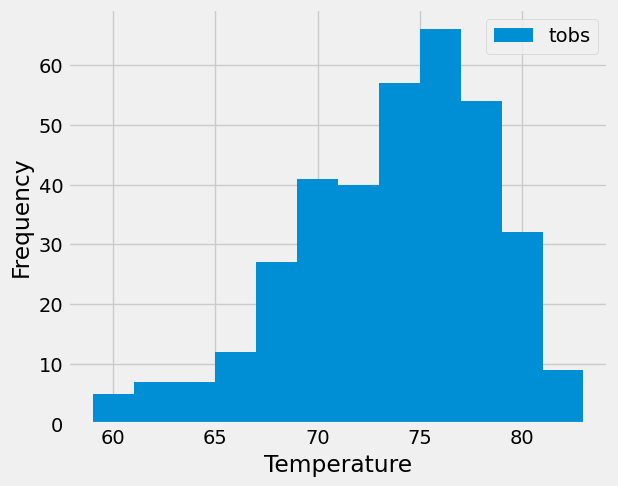

In [23]:
# Sort the dataframe by date
df = pd.DataFrame(year_temp, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")

# Save Image
plt.savefig("Fig2.png")

# Close Session

In [24]:
# Close Session
session.close()